In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
X_train_data = pd.read_csv('D:\\my projects\\tabular playground series\\train.csv')
X_test_data = pd.read_csv('D:\\my projects\\tabular playground series\\test.csv')
data = pd.concat([X_train_data, X_test_data], axis = 0)

In [27]:
data.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0.0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0.0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0.0


In [28]:
data.index = data['id']

In [29]:
data.drop(['id'],axis=1, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47345 entries, 0 to 47344
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    47345 non-null  object 
 1   loading         46872 non-null  float64
 2   attribute_0     47345 non-null  object 
 3   attribute_1     47345 non-null  object 
 4   attribute_2     47345 non-null  int64  
 5   attribute_3     47345 non-null  int64  
 6   measurement_0   47345 non-null  int64  
 7   measurement_1   47345 non-null  int64  
 8   measurement_2   47345 non-null  int64  
 9   measurement_3   46635 non-null  float64
 10  measurement_4   46398 non-null  float64
 11  measurement_5   46161 non-null  float64
 12  measurement_6   45925 non-null  float64
 13  measurement_7   45688 non-null  float64
 14  measurement_8   45451 non-null  float64
 15  measurement_9   45214 non-null  float64
 16  measurement_10  44978 non-null  float64
 17  measurement_11  44741 non-null 

In [31]:
data.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,46872.000000,47345.000000,47345.000000,47345.000000,47345.000000,47345.000000,46635.000000,46398.000000,46161.000000,45925.000000,...,45214.000000,44978.000000,44741.000000,44504.000000,44268.000000,44031.000000,43794.000000,43557.000000,43321.000000,26570.000000
mean,127.742337,7.184032,6.782511,7.432422,8.552793,6.199683,17.792378,11.729944,17.132315,17.512970,...,11.425098,16.120460,19.029202,11.795419,15.689501,16.081604,15.048413,16.537596,701.322119,0.212608
std,39.084410,1.484426,1.752717,4.186657,4.274405,3.550439,1.001631,1.000809,1.001835,0.997767,...,0.999505,1.477943,1.559309,1.438893,1.248694,1.457224,1.548537,1.682775,126.381679,0.409160
min,33.160000,5.000000,4.000000,0.000000,0.000000,0.000000,13.565000,7.384000,12.073000,12.715000,...,7.537000,9.167000,12.461000,5.167000,9.209000,8.415000,8.417000,9.701000,1.671000,0.000000
25%,99.777500,6.000000,5.000000,4.000000,5.000000,4.000000,17.117000,11.050000,16.450000,16.843000,...,10.753000,15.164000,17.958000,10.861000,14.884000,15.137000,14.008000,15.371000,618.905000,0.000000
50%,122.260000,7.000000,7.000000,7.000000,8.000000,6.000000,17.788000,11.731000,17.132000,17.514000,...,11.423000,16.118000,19.053000,11.821000,15.672000,16.081000,15.010000,16.558000,701.220000,0.000000
75%,149.010000,9.000000,8.000000,10.000000,11.000000,8.000000,18.474000,12.411000,17.813000,18.186000,...,12.098000,17.081750,20.107000,12.751000,16.467000,17.048000,16.056000,17.698000,784.373000,0.000000
max,385.860000,9.000000,9.000000,30.000000,33.000000,28.000000,21.499000,16.484000,21.681000,21.543000,...,15.412000,23.354000,25.640000,18.962000,22.713000,23.140000,22.097000,24.094000,1312.794000,1.000000


array([[<AxesSubplot:title={'center':'loading'}>,
        <AxesSubplot:title={'center':'attribute_2'}>,
        <AxesSubplot:title={'center':'attribute_3'}>,
        <AxesSubplot:title={'center':'measurement_0'}>,
        <AxesSubplot:title={'center':'measurement_1'}>],
       [<AxesSubplot:title={'center':'measurement_2'}>,
        <AxesSubplot:title={'center':'measurement_3'}>,
        <AxesSubplot:title={'center':'measurement_4'}>,
        <AxesSubplot:title={'center':'measurement_5'}>,
        <AxesSubplot:title={'center':'measurement_6'}>],
       [<AxesSubplot:title={'center':'measurement_7'}>,
        <AxesSubplot:title={'center':'measurement_8'}>,
        <AxesSubplot:title={'center':'measurement_9'}>,
        <AxesSubplot:title={'center':'measurement_10'}>,
        <AxesSubplot:title={'center':'measurement_11'}>],
       [<AxesSubplot:title={'center':'measurement_12'}>,
        <AxesSubplot:title={'center':'measurement_13'}>,
        <AxesSubplot:title={'center':'measurement_1

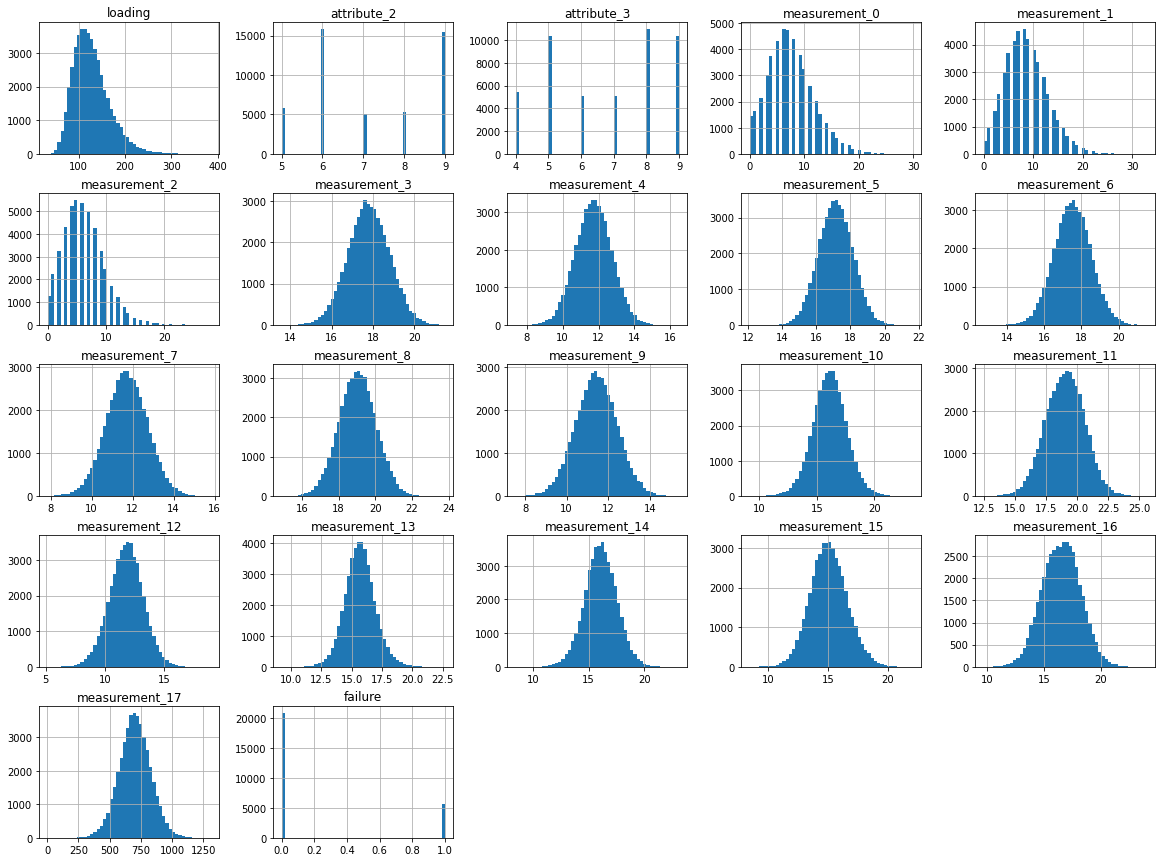

In [32]:
data.hist(bins=50,figsize=(20,15))

In [33]:
from pandas.plotting import scatter_matrix

In [34]:
attribute = ['attribute_2','attribute_3','measurement_0','measurement_1','measurement_2']

array([[<AxesSubplot:xlabel='attribute_2', ylabel='attribute_2'>,
        <AxesSubplot:xlabel='attribute_3', ylabel='attribute_2'>,
        <AxesSubplot:xlabel='measurement_0', ylabel='attribute_2'>,
        <AxesSubplot:xlabel='measurement_1', ylabel='attribute_2'>,
        <AxesSubplot:xlabel='measurement_2', ylabel='attribute_2'>],
       [<AxesSubplot:xlabel='attribute_2', ylabel='attribute_3'>,
        <AxesSubplot:xlabel='attribute_3', ylabel='attribute_3'>,
        <AxesSubplot:xlabel='measurement_0', ylabel='attribute_3'>,
        <AxesSubplot:xlabel='measurement_1', ylabel='attribute_3'>,
        <AxesSubplot:xlabel='measurement_2', ylabel='attribute_3'>],
       [<AxesSubplot:xlabel='attribute_2', ylabel='measurement_0'>,
        <AxesSubplot:xlabel='attribute_3', ylabel='measurement_0'>,
        <AxesSubplot:xlabel='measurement_0', ylabel='measurement_0'>,
        <AxesSubplot:xlabel='measurement_1', ylabel='measurement_0'>,
        <AxesSubplot:xlabel='measurement_2', ylabe

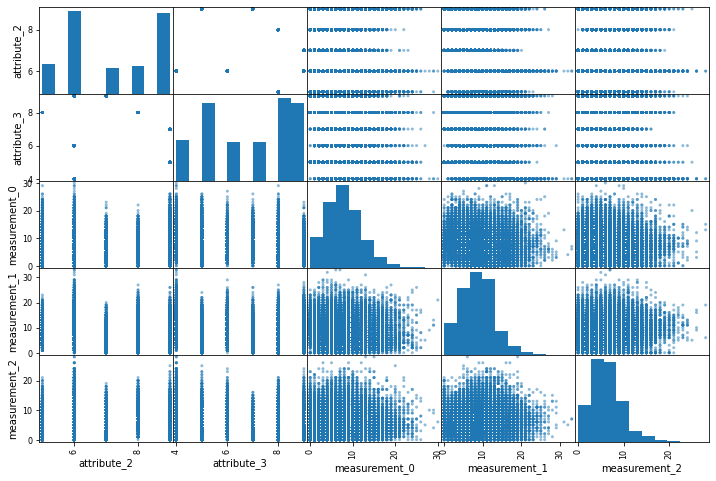

In [35]:
scatter_matrix(data[attribute],figsize=[12,8])

## Data clean

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(data[['loading']])

In [38]:
data_loading = pd.DataFrame(X, columns=['loading'])

In [39]:
imputer = SimpleImputer(strategy='median')
y = imputer.fit_transform(data.iloc[:,9:24])

In [40]:
data_null = pd.DataFrame(y, columns=data.iloc[:,9:24].columns)

## Catgeorical Data

In [41]:
data['attribute_0'].value_counts()

material_7    31566
material_5    15779
Name: attribute_0, dtype: int64

In [42]:
data['attribute_1'].value_counts()

material_6    15872
material_5    15590
material_8    10865
material_7     5018
Name: attribute_1, dtype: int64

In [43]:
data['product_code'].value_counts()

C    5765
F    5422
E    5343
B    5250
I    5228
D    5112
G    5107
A    5100
H    5018
Name: product_code, dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
hot_encd = OneHotEncoder()
data_cat0 = hot_encd.fit_transform(data[['attribute_0']])
data_cat1 = hot_encd.fit_transform(data[['attribute_1']])

In [46]:
a = data_cat0.toarray()
b = data_cat1.toarray()

In [47]:
data_cat = pd.DataFrame(a, columns=['att0_material_7','att0_material_5'])
data_cat_1 = pd.DataFrame(b, columns=['att1_material_6','att1_material_5','att1_material_8','att1_material_7'])

In [48]:
data_cat_2 = pd.get_dummies(data['product_code'])

## Scaling

In [66]:
not_null_data = data[attribute]
data_scaling = pd.concat([data_loading,not_null_data,data_null],axis=1)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
std_scaler = StandardScaler()
scale_data = std_scaler.fit_transform(data_scaling)

In [69]:
scale_data = pd.DataFrame(scale_data, columns=data_scaling.columns)

In [70]:
scale_data.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-1.225108,1.223359,-1.01701,-0.103287,-0.129328,-0.619559,0.249163,0.795402,-1.399396,1.810355,...,1.142622,-0.770934,-0.181420,-0.947682,2.434351,-0.546089,-0.000400,-1.350611,-1.149428,0.519368
1,-1.101935,1.223359,-1.01701,1.568709,-1.299094,-0.901217,0.423193,-0.191740,0.591065,0.386697,...,-1.153632,1.047357,1.268068,-0.735915,-0.030073,-0.792066,-0.467210,-0.436789,-0.562703,-0.159289
2,-1.165193,1.223359,-1.01701,1.090996,-1.767000,-0.337901,0.266264,-0.078694,-0.398605,0.739813,...,-0.749305,1.320715,-0.356358,0.014837,1.434388,0.846954,1.814182,-0.638891,0.871582,-0.313817
3,-0.685871,1.223359,-1.01701,1.329853,-1.533047,-0.056242,-0.500273,-0.547031,1.459428,0.840558,...,0.033002,1.070905,0.156655,-0.431128,-1.273755,-0.363055,-0.369721,0.744263,0.392041,1.033736
4,1.551050,1.223359,-1.01701,0.374426,-1.533047,0.507074,1.562938,1.231440,-0.143859,-1.798145,...,-0.946908,-1.113912,0.667586,0.594723,0.452346,0.408833,-2.363626,-1.270710,-0.078826,-1.004452


## Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [84]:
V = pd.concat([data_cat_2,scale_data,data_cat, data_cat_1],axis=1)

In [85]:
W = data['failure']

In [86]:
X_train = V.iloc[:26570]

In [91]:
y_train = W.iloc[:26570]

In [97]:
train_all = pd.concat([X_train,y_train],axis=1)

In [98]:
X_test = V.iloc[26570:]

In [107]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_train, y_train,test_size=0.2, random_state=42) 

## Apply algorithms

In [108]:
from sklearn.linear_model import SGDClassifier

In [109]:
sgd_clf = SGDClassifier(random_state=42)

In [110]:
sgd_clf.fit(X_train_set,y_train_set)

SGDClassifier(random_state=42)

In [126]:
model0 = sgd_clf.predict(X_test_set)

In [130]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

In [128]:
confusion_matrix(y_test_set,model0)

array([[4257,    0],
       [1057,    0]], dtype=int64)

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [140]:
model1 = log_reg.predict(X_test_set)

In [141]:
confusion_matrix(y_test_set,model1)

array([[4249,    8],
       [1052,    5]], dtype=int64)

In [143]:
precision_score(y_test_set,model1)

0.38461538461538464

In [144]:
recall_score(y_test_set,model1)

0.004730368968779565

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
ran_clf = RandomForestClassifier(random_state=50)

In [147]:
ran_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [148]:
model2 = ran_clf.predict(X_test_set)

In [149]:
precision_score(y_test_set,model2)

1.0

In [150]:
recall_score(y_test_set,model2)

1.0

In [151]:
confusion_matrix(y_test_set,model2)

array([[4257,    0],
       [   0, 1057]], dtype=int64)